# Parte 1: Estadísticas para ingenieros que miran el cielo


## 1.1 Promedio y desvio

### Melbourne

In [272]:
import csv
archivo='temperature_Melbourne_celsius.csv'
valores_melbourne= []
promedio_melbourne = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_melbourne = [float(fila[0]) for fila in reader]

promedio_melbourne = sum(valores_melbourne) / len(valores_melbourne)
varianza_melbourne = sum((x - promedio_melbourne)**2 for x in valores_melbourne ) / (len(valores_melbourne) - 1) 
desvio_melbourne=varianza_melbourne**(0.5)

print("Promedio:", promedio_melbourne)
print("Varianza:", varianza_melbourne)
print("Desvio:", desvio_melbourne)


Promedio: 17.53388090349076
Varianza: 41.96000198204841
Desvio: 6.477654049271882


### Oslo

In [273]:
import csv
archivo='temperature_Oslo_celsius.csv'
valores_oslo= []
promedio_oslo = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_oslo = [float(fila[0]) for fila in reader]

promedio_oslo = sum(valores_oslo) / len(valores_oslo)
varianza_oslo = sum((x - promedio_oslo)**2 for x in valores_oslo ) / (len(valores_oslo) - 1) 
desvio_oslo=varianza_oslo**(0.5)

print("Promedio:", promedio_oslo)
print("Varianza:", varianza_oslo)
print("Desvio:", desvio_oslo)

Promedio: 4.611225188227242
Varianza: 89.52365285429613
Desvio: 9.461693973823934


### Quito

In [274]:
import csv
archivo='temperature_Quito_celsius.csv'
valores_quito= []
promedio_quito = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_quito = [float(fila[0]) for fila in reader]

promedio_quito = sum(valores_quito) / len(valores_quito)
varianza_quito = sum((x - promedio_quito)**2 for x in valores_quito ) / (len(valores_quito) - 1) 
desvio_quito=varianza_quito**(0.5)

print("Promedio:", promedio_quito)
print("Varianza:", varianza_quito)
print("Desvio:", desvio_quito)

Promedio: 13.603524982888432
Varianza: 1.6943979779826284
Desvio: 1.3016904309330342


## 1.2 Calcular el factor de correlación cruzada entre cada par de señales

In [275]:
def correlacion_cruzada(valores_A, valores_B, desvio_A, desvio_B, promedio_A, promedio_B):
    producto=0
    for i in range(0, len(valores_A)):
        producto = producto + (valores_A[i] * valores_B[i] - promedio_A * promedio_B)
    
    cov=(producto)/len(valores_A)

    correlacion_A_B = cov / (desvio_A * desvio_B)

    print(correlacion_A_B)


### Melbourne y Oslo

In [276]:
correlacion_cruzada(valores_melbourne, valores_oslo, desvio_melbourne, desvio_oslo, promedio_melbourne, promedio_oslo)

-0.22128773176900715


### Melbourne y Quito

In [277]:
correlacion_cruzada(valores_melbourne, valores_quito, desvio_melbourne, desvio_quito, promedio_melbourne, promedio_quito)

-0.05331188809647593


### Oslo y Quito

In [278]:
correlacion_cruzada(valores_oslo, valores_quito, desvio_oslo, desvio_quito, promedio_oslo, promedio_quito)

0.06617787220981441


Con estos datos podemos decir que las temperaturas en las distintas ciudades no tienen nada que ver una con la otra, el clima de una no nos aporta ninguna información sobre el clima en las otras ciudades

# Parte 2: Una fuente de calor... markoviana

In [279]:
def crear_fuente(valores):
    fuente = []
    for i in valores:
        if (i < 11.0):
            fuente.append(0)
        elif ((i >= 11.0) and (i < 19.0)):
            fuente.append(1)
        else:
            fuente.append(2)
    return fuente

In [280]:
fuente_quito = crear_fuente(valores_quito)
fuente_melbourne = crear_fuente(valores_melbourne)
fuente_oslo = crear_fuente(valores_oslo)

print(fuente_quito )
print(fuente_melbourne)
print(fuente_oslo)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 1. Matrices de transición

In [281]:
import numpy as np

def matriz_transicion(fuente):
    m_transicion = np.zeros((3, 3), dtype=float)

    for i in range(1, len(fuente)):
        m_transicion[fuente[i], fuente[i - 1]] += 1

    # Sumar columnas
    suma_columnas = [0, 0, 0]
    for i in range(3):
        for j in range(3):
            suma_columnas[j] += m_transicion[i, j]

    # Normalizar columnas
    for i in range(3):
        for j in range(3):
            if suma_columnas[j] != 0:
                m_transicion[i, j] /= suma_columnas[j]

    print("Matriz de transición:")
    print(m_transicion)
    #print("Sumas por columna:")
    #print(suma_columnas)
    return m_transicion


In [282]:
m_transicion_quito = matriz_transicion(fuente_quito)
m_transicion_melbourne = matriz_transicion(fuente_melbourne)
m_transicion_oslo = matriz_transicion(fuente_oslo)

Matriz de transición:
[[5.40540541e-02 6.03240262e-03 0.00000000e+00]
 [9.45945946e-01 9.93278180e-01 1.00000000e+00]
 [0.00000000e+00 6.89417442e-04 0.00000000e+00]]
Matriz de transición:
[[0.47       0.03347988 0.00260611]
 [0.495      0.83564423 0.14408042]
 [0.035      0.13087589 0.85331348]]
Matriz de transición:
[[0.95932119 0.09939024 0.        ]
 [0.04067881 0.8652439  0.29591837]
 [0.         0.03536585 0.70408163]]


## 2. Muestreo Montecarlo

### Probabilidad estacionaria

#### Calculamos la matriz de transicion acumulada 

In [283]:
def matriz_acumulada(m_transicion):
    m_acumulada = np.zeros((3, 3), dtype=float)

    for j in range(3):
        m_acumulada[0][j] = m_transicion[0, j]

    for i in range(1, 3):
        for j in range(0, 3):
            m_acumulada[i][j] = m_acumulada[i-1][j] + m_transicion[i][j]
    
    return m_acumulada

In [284]:
m_acumulada_quito = matriz_acumulada(m_transicion_quito)
m_acumulada_melbourne = matriz_acumulada(m_transicion_melbourne)
m_acumulada_oslo = matriz_acumulada(m_transicion_oslo)

print(m_acumulada_quito)
print(m_acumulada_melbourne)
print(m_acumulada_oslo)

[[0.05405405 0.0060324  0.        ]
 [1.         0.99931058 1.        ]
 [1.         1.         1.        ]]
[[0.47       0.03347988 0.00260611]
 [0.965      0.86912411 0.14668652]
 [1.         1.         1.        ]]
[[0.95932119 0.09939024 0.        ]
 [1.         0.96463415 0.29591837]
 [1.         1.         1.        ]]


#### Calculamos las probabilidades del primer simbolo y la probabilidad acumulada

In [285]:
def probabilidad_simbolos(fuente):
    probabilidad = [0, 0, 0]
    for s in fuente:
        probabilidad[s] += 1

    for i in range(3):
        probabilidad[i] = probabilidad[i] / len(fuente)
    
    return probabilidad

In [286]:
prob_quito = probabilidad_simbolos(fuente_quito)
prob_melbourne = probabilidad_simbolos(fuente_melbourne)
prob_oslo = probabilidad_simbolos(fuente_oslo)

print(prob_quito)
print(prob_melbourne)
print(prob_oslo)

[0.006331279945242984, 0.992984257357974, 0.0006844626967830253]
[0.034223134839151265, 0.5059890485968515, 0.45978781656399725]
[0.6858316221765913, 0.2806297056810404, 0.03353867214236824]


In [287]:
def probabilidad_simb_acumulada(prob):
    prob_acumulada = [0, 0, 0]

    prob_acumulada[0] = prob[0]

    for i in range (1, 3):
        prob_acumulada[i] = prob_acumulada[i-1] + prob[i]

    return prob_acumulada

In [288]:
prob_acumulada_quito = probabilidad_simb_acumulada(prob_quito)
prob_acumulada_melbourne = probabilidad_simb_acumulada(prob_melbourne)
prob_acumulada_oslo = probabilidad_simb_acumulada(prob_oslo)

print(prob_acumulada_quito)
print(prob_acumulada_melbourne)
print(prob_acumulada_oslo)

[0.006331279945242984, 0.999315537303217, 1.0]
[0.034223134839151265, 0.5402121834360027, 1.0]
[0.6858316221765913, 0.9664613278576317, 1.0]


In [289]:
import random

S_MIN = 1000
VENTANA_CONVERGENCIA = 50

def primer_simb(prob_acum_v0):
    r = random.random()
    for i in range(3):
        if r < prob_acum_v0[i]:
            return i

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i

def converge(A, B):
    epsilon = 0.001
    for i in range(3):
        if abs(A[i] - B[i]) > epsilon:
            return False
    return True

def distancia(v1, v2):
    return sum(abs(v1[i] - v2[i]) for i in range(3))
 
def calcular_vector_estacionario(m_acumulada, prob_acum_v0):
    emisiones = [0, 0, 0]
    V = [0, 0, 0]
    V_ant = [-1, -1, -1]
    cant_simb = 0
    diferencia_vectores = []
    iteraciones = []
    punto_convergencia = 0
    contador_convergencia = 0

    s = primer_simb(prob_acum_v0)
    
    while (contador_convergencia < VENTANA_CONVERGENCIA or cant_simb < S_MIN):
        s = sig_dado_ant(s, m_acumulada)
        emisiones[s] += 1
        cant_simb += 1
        V_ant = V.copy()

        for i in range(3):
            V[i] = emisiones[i] / cant_simb

        if converge(V, V_ant):
            contador_convergencia += 1
            if punto_convergencia == 0 and contador_convergencia >= VENTANA_CONVERGENCIA:
                punto_convergencia = cant_simb
        else:
            contador_convergencia = 0 

        diferencia_actual = distancia(V, V_ant)
        diferencia_vectores.append(diferencia_actual)
        iteraciones.append(cant_simb)

    return V, diferencia_vectores, iteraciones, punto_convergencia


In [290]:
v_estacionario_quito, diferencia_quito, iteraciones_quito, convergencia_quito  = calcular_vector_estacionario(m_acumulada_quito, prob_acumulada_quito)
v_estacionario_melbourne, diferencia_melbourne, iteraciones_melbourne, convergencia_melbourne = calcular_vector_estacionario(m_acumulada_melbourne, prob_acumulada_melbourne)
v_estacionario_oslo, diferencia_oslo, iteraciones_oslo, convergencia_oslo = calcular_vector_estacionario(m_acumulada_oslo, prob_acumulada_oslo)

print(f"Vector estacionario para la ciudad de Quito: {v_estacionario_quito}")
print(f"Valor de convergencia: {convergencia_quito}")
print(" ")
print(f"Vector estacionario para la ciudad de Melbourne: {v_estacionario_melbourne}")
print(f"Valor de convergencia: {convergencia_melbourne}")
print(" ")
print(f"Vector estacionario para la ciudad de Oslo: {v_estacionario_oslo}")
print(f"Valor de convergencia: {convergencia_oslo}")

Vector estacionario para la ciudad de Quito: [0.006750241080038573, 0.9932497589199615, 0.0]
Valor de convergencia: 51
 
Vector estacionario para la ciudad de Melbourne: [0.037, 0.567, 0.396]
Valor de convergencia: 594
 
Vector estacionario para la ciudad de Oslo: [0.667, 0.309, 0.024]
Valor de convergencia: 664


Ahora que tenemos tanto los vectores estacionarios, como las diferencias y las iteraciones donde se producen esas diferencias, podemos hacer un gráfico para observar de mejor manera esta convergencia en las probabilidades de los símbolos

In [291]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_convergencia(iteraciones, diferencia_vectores, nombre_ciudad, convergencia):
    plt.figure(figsize=(10, 6))
    plt.plot(iteraciones, diferencia_vectores, label="Distancia entre vectores", color='red', linewidth=1.5)
    plt.xlabel('Cantidad de símbolos generados', fontsize=12)
    plt.axvline(x=convergencia, linestyle='--', color='green', linewidth=1.5, label=f'Convergencia en {convergencia}')
    plt.text(
        convergencia,
        max(diferencia_vectores)*0.9,
        f'{convergencia}',
        rotation=90,
        va='bottom', ha='right',
        fontsize=10,
        color='green'
    )
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.xticks(np.arange(0, 1001, 50))
    plt.ylabel('Distancia', fontsize=12)
    plt.title(f"Convergencia del Vector Estacionario {nombre_ciudad}", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=11, loc='upper right')
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)  # Ajuste manual de márgenes
    plt.show()


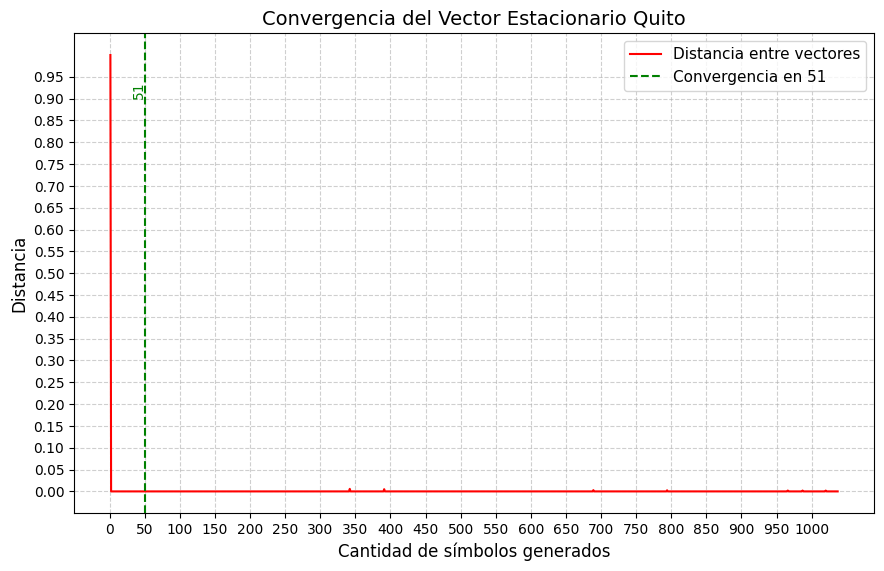

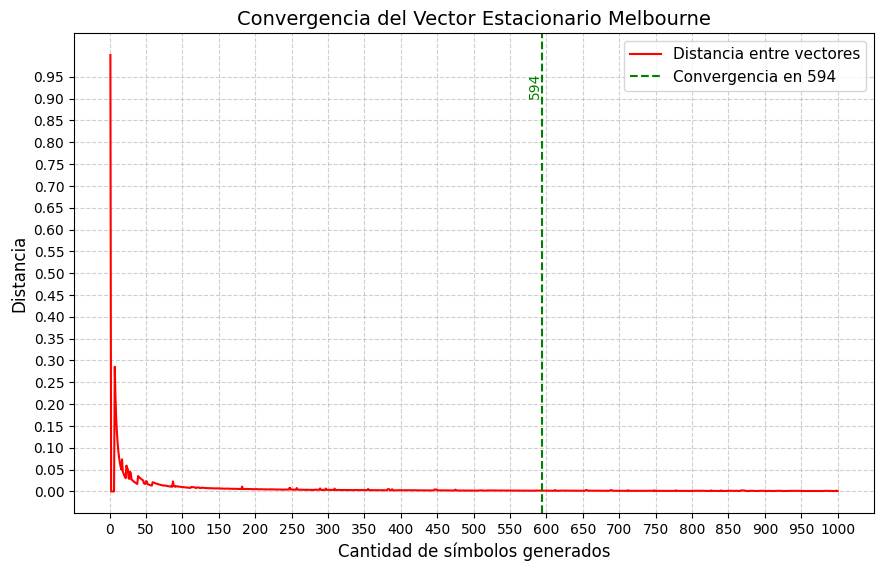

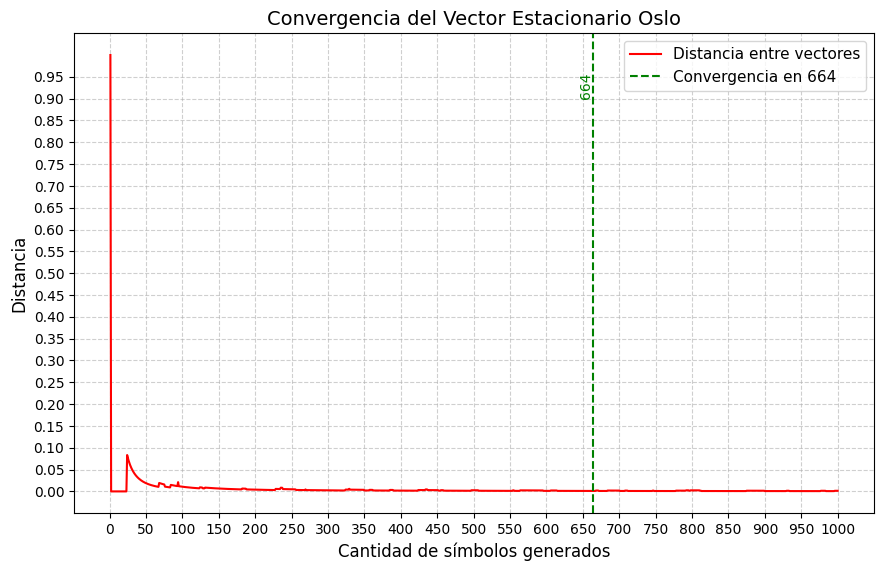

In [292]:
graficar_convergencia(iteraciones_quito, diferencia_quito, "Quito", convergencia_quito)
graficar_convergencia(iteraciones_melbourne, diferencia_melbourne, "Melbourne", convergencia_melbourne)
graficar_convergencia(iteraciones_oslo, diferencia_oslo, "Oslo", convergencia_oslo)

### Tiempo medio de primera recurrencia

In [293]:
S_MIN = 1000

def converge(A, B):
    epsilon = 0.05
    if abs(A - B) > epsilon:
        return False
    return True

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i


def Media_recurrencia(simbolo,m_acumulada):
    retornos=0
    media=0
    media_ant=-1
    t_actual=0
    s=simbolo
    while (not converge(media,media_ant)or (t_actual<S_MIN)):
        s=sig_dado_ant(s,m_acumulada)
        t_actual+=1
        if(s==simbolo):
            retornos+=1
            media_ant=media
            media=t_actual/retornos

    return media

### Media de recurrencia para simbolos F,T,C Quito

In [294]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_quito)))

Media de primera recurrencia para simbolo F 162.98837209302326
Media de primera recurrencia para simbolo T 1.0121457489878543
Media de primera recurrencia para simbolo C 1342.4320652173913


### Media de recurrencia para simbolos F,T,C Melborne

In [295]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_melbourne)))

Media de primera recurrencia para simbolo F 36.629629629629626
Media de primera recurrencia para simbolo T 1.7857142857142858
Media de primera recurrencia para simbolo C 2.192982456140351


### Media de recurrencia para simbolos F,T,C Oslo

In [296]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_oslo)))

Media de primera recurrencia para simbolo F 1.3315579227696406
Media de primera recurrencia para simbolo T 3.2051282051282053
Media de primera recurrencia para simbolo C 37.265306122448976


In [297]:
import heapq

class Nodo:
    def __init__(self, probabilidad, izq=None, der=None):
        self.probabilidad = probabilidad
        self.nodo_izq = izq
        self.nodo_der = der

    def __lt__(self, other):
        return self.probabilidad < other.probabilidad

class Nodo_hoja(Nodo):
    def __init__(self, simbolo, probabilidad):
        super().__init__(probabilidad)
        self.simbolo = simbolo

def insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos):
    for i in range(len(lista_prob)):
        n = Nodo_hoja(lista_simbolos[i], lista_prob[i])
        heapq.heappush(min_heap_nodos, n)

def encontrar_arbol_huffman(min_heap_nodos, lista_prob, lista_simbolos):
    insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos)
    while len(min_heap_nodos) > 1:
        min1 = heapq.heappop(min_heap_nodos)
        min2 = heapq.heappop(min_heap_nodos)
        suma_minimos = min1.probabilidad + min2.probabilidad
        nodo_suma = Nodo(suma_minimos, min1, min2)
        heapq.heappush(min_heap_nodos, nodo_suma)
    return heapq.heappop(min_heap_nodos)  

def generar_codigos(nodo, codigo_actual="", diccionario=None):
    if diccionario is None:
        diccionario = {}

    if isinstance(nodo, Nodo_hoja):  # Es una hoja, asignar código
        diccionario[nodo.simbolo] = codigo_actual
    else:
        # Ir a la izquierda → agregar '0'
        if nodo.nodo_izq:
            generar_codigos(nodo.nodo_izq, codigo_actual + "0", diccionario)
        # Ir a la derecha → agregar '1'
        if nodo.nodo_der:
            generar_codigos(nodo.nodo_der, codigo_actual + "1", diccionario)

    return diccionario
heap =[]
print(generar_codigos(encontrar_arbol_huffman(heap,prob_melbourne, ["F","T","C"])))


{'F': '00', 'C': '01', 'T': '1'}
